In [3]:
import numpy as np
import pandas as pd

import re

import os.path
from os import path

from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.cluster import KMeans

import wrangle as wr
import preprocessing as pr
from preprocessing_permits import permits_preprocessing_mother_function, create_clusters
import explore as ex
import model as mo

import warnings
warnings.filterwarnings("ignore")

In [27]:
df = permits_preprocessing_mother_function()
df.head()

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,...,city_state_high_density_value_delta_pct,market_volume,market_volume_delta_pct,ei,city_state,bldgs_est_2y_growth_rate,units_value_est_2y_growth_rate,five_or_more_units_value_est_2y,five_or_more_units_bldgs_est_2y,should_enter
0,Albany,NY,1997,30.0,425.0,17871000.0,14.166667,5.957000e+05,42049.411765,NaN,...,NaN,2.054924e+10,-0.655038,NaN,Albany_NY,NaN,NaN,0.370041,0.300000,False
1,Albany,NY,1998,47.0,1038.0,54232000.0,22.085106,1.153872e+06,52246.628131,0.566667,...,2.034637,2.529787e+10,0.231085,2.465010,Albany_NY,NaN,NaN,-0.702574,-0.468085,False
2,Albany,NY,1999,39.0,515.0,24484000.0,13.205128,6.277949e+05,47541.747573,-0.170213,...,-0.548532,2.609590e+10,0.031545,0.437662,Albany_NY,0.300000,0.370041,0.002124,0.435897,False
3,Albany,NY,2000,25.0,346.0,16130000.0,13.840000,6.452000e+05,46618.497110,-0.358974,...,-0.341202,2.742204e+10,0.050818,0.626938,Albany_NY,-0.468085,-0.702574,0.837198,0.880000,False
4,Albany,NY,2001,56.0,502.0,24536000.0,8.964286,4.381429e+05,48876.494024,1.240000,...,0.521141,2.913103e+10,0.062322,1.431902,Albany_NY,0.435897,0.002124,0.539167,-0.214286,False


In [28]:
top_50_mask = df.groupby('city').total_high_density_value.sum().nlargest(49).index.to_list()

def in_top_50(x):
    return x in top_50_mask

df_50 = df[df.city.apply(in_top_50)]

In [29]:
df.shape

(2990, 21)

In [55]:
df_clustered, kmeans, centroids, scaler, scaled_ei_threshold_value = create_clusters(df)

In [56]:
df_clustered.shape, df_clustered.should_enter.sum()

((2860, 22), 306)

In [59]:
df_clustered = df_clustered[~((df_clustered.year == 2009) | (df_clustered.year == 2010))]

In [60]:
df_clustered.shape,  df_clustered.should_enter.sum()

((2600, 22), 239)

In [61]:
df_clustered.groupby('cluster').should_enter.agg(['sum', 'mean'])

,sum,mean
cluster,,
0,61.0,0.120079
1,13.0,0.046763
2,21.0,0.035473
3,23.0,0.050218
4,89.0,0.395556
5,32.0,0.059369


The top 130 markets are responsible for 83-90% of all new build

ValueError: scatter requires x column to be numeric

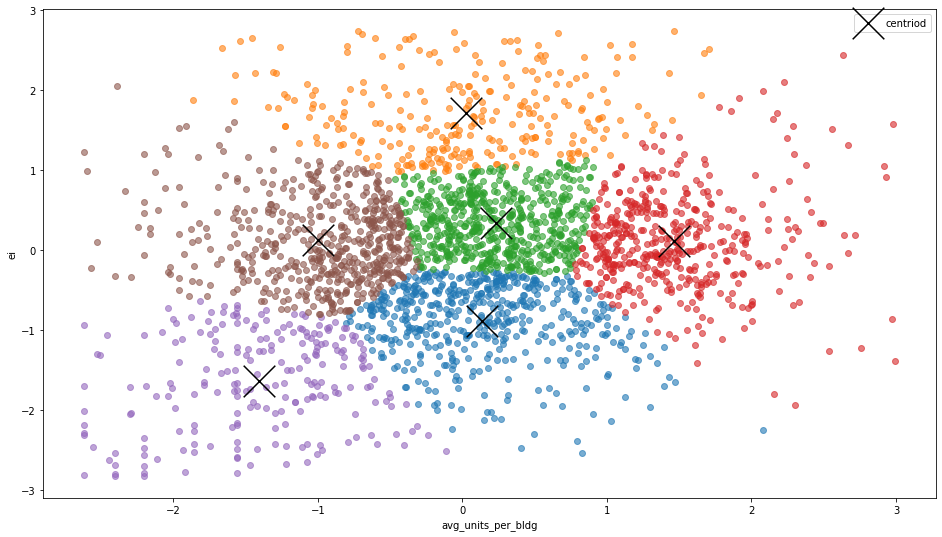

In [62]:
plt.figure(figsize=(16,9))
ex.visualize_clusters(df_clustered, centroids, scaled_ei_threshold_value)

In [40]:
df.groupby('city').should_enter.sum()[df.groupby('city').should_enter.sum() == 1]

city
Allentown        1.0
Appleton         1.0
Boston           1.0
Buffalo          1.0
Burlington       1.0
Charlotte        1.0
Columbia         1.0
Fort Collins     1.0
Green Bay        1.0
Greensboro       1.0
Hartford         1.0
Houston          1.0
Jacksonville     1.0
Las Vegas        1.0
Louisville       1.0
Madison          1.0
Miami            1.0
Milwaukee        1.0
Minneapolis      1.0
Naples           1.0
Nashville        1.0
Orlando          1.0
Portland         1.0
Provo            1.0
Rochester        1.0
Sacramento       1.0
San Diego        1.0
San Francisco    1.0
Seattle          1.0
Spokane          1.0
St. Louis        1.0
Name: should_enter, dtype: float64

In [36]:
df.groupby('year').should_enter.sum()

year
1997    10.0
1998    11.0
1999     8.0
2000    22.0
2001    12.0
2002    11.0
2003    11.0
2004    11.0
2005    10.0
2006    13.0
2007     4.0
2008     9.0
2009    32.0
2010    35.0
2011    34.0
2012    20.0
2013    19.0
2014    13.0
2015    13.0
2016     6.0
2017    12.0
2018     0.0
2019     0.0
Name: should_enter, dtype: float64

In [87]:
df_clustered['count_1'] = 1

In [89]:
df_clustered

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,...,market_volume_delta_pct,ei,city_state,bldgs_est_2y_growth_rate,units_value_est_2y_growth_rate,five_or_more_units_value_est_2y,five_or_more_units_bldgs_est_2y,should_enter,cluster,count_1
1,Albany,NY,1998,47.0,1038.0,54232000.0,0.499727,1.153872e+06,52246.628131,0.566667,...,0.231085,1.200626,Albany_NY,NaN,NaN,-0.702574,-0.468085,False,1,1
2,Albany,NY,1999,39.0,515.0,24484000.0,-0.493115,6.277949e+05,47541.747573,-0.170213,...,0.031545,-1.118050,Albany_NY,0.300000,0.370041,0.002124,0.435897,False,0,1
3,Albany,NY,2000,25.0,346.0,16130000.0,-0.398138,6.452000e+05,46618.497110,-0.358974,...,0.050818,-0.655825,Albany_NY,-0.468085,-0.702574,0.837198,0.880000,False,0,1
4,Albany,NY,2001,56.0,502.0,24536000.0,-1.307457,4.381429e+05,48876.494024,1.240000,...,0.062322,0.503915,Albany_NY,0.435897,0.002124,0.539167,-0.214286,False,5,1
5,Albany,NY,2002,47.0,475.0,29634000.0,-1.049695,6.305106e+05,62387.368421,-0.160714,...,0.088016,0.146820,Albany_NY,0.880000,0.837198,0.825639,0.297872,False,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,York,PA,2015,3.0,53.0,3185000.0,0.081753,1.061667e+06,60094.339623,-0.666667,...,0.313639,-1.170629,York_PA,-0.727273,-0.547264,2.203768,4.000000,True,0,1
2986,York,PA,2016,3.0,34.0,1566000.0,-0.808043,5.220000e+05,46058.823529,0.000000,...,-0.052294,-0.905714,York_PA,-0.666667,-0.729440,0.379310,-0.333333,False,0,1
2987,York,PA,2017,15.0,83.0,10204000.0,-2.387242,6.802667e+05,122939.759036,4.000000,...,0.046775,2.050569,York_PA,4.000000,2.203768,1.567229,0.666667,False,5,1
2988,York,PA,2018,2.0,26.0,2160000.0,-0.524968,1.080000e+06,83076.923077,-0.866667,...,0.034393,-1.887526,York_PA,-0.333333,0.379310,NaN,NaN,False,4,1


In [109]:
# df.pivot(index='foo', columns='bar', values='baz')


pivot = df_clustered.groupby(['city_state', 'cluster']).count_1.sum().reset_index()

In [110]:
pivot_table = pivot.pivot(index='city_state', columns='cluster', values='count_1')

In [114]:
pivot_table.max(axis=1).mean()

7.976923076923077

In [ ]:
df['enter_index'] = (1 + df.market_share) * (1 + df.five_or_more_units_value_est_2y)

In [ ]:
sns.boxplot(df.enter_index)

In [ ]:
(df.enter_index > 0).mean()

In [ ]:
df.enter_index.nlargest(1)

In [ ]:
df.loc[1810]

In [ ]:
df.total_high_density_value.nlargest()

In [ ]:
scatter = df.groupby('city_state')[['ei', 'avg_units_per_bldg']].mean().reset_index()
scatter

In [ ]:
plt.figure(figsize=(30, 30))
ax = sns.scatterplot(x=scatter.avg_units_per_bldg, y=scatter.ei)



def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(scatter.avg_units_per_bldg, scatter.ei, scatter.city_state, plt.gca())
plt.show()

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(scatter.avg_units_per_bldg, scatter.ei, scatter.city_state, plt.gca())  

In [ ]:
df[['total_high_density_units', 'total_high_density_bldgs', 'avg_units_per_bldg']].corr()

In [ ]:
df[['year','total_high_density_bldgs','five_or_more_units_bldgs_est_2y']].head(23)

In [ ]:
def labeling_future_data(df):
    """this function takes in a data frame and returns a boolean column that identifies
    if a city_state_year is a market that should be entered"""
    
    df.sort_values(by=['city', 'state', 'year'])
    
    df["bldgs_est_2y_growth_rate"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_high_density_bldgs"]]
                                  .pct_change(2))
    
    df["units_value_est_2y_growth_rate"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_high_density_value"]]
                                  .pct_change(2))
                                  
    df['five_or_more_units_value_est_2y'] = df["units_value_est_2y_growth_rate"].shift(-2)
    
    df['five_or_more_units_bldgs_est_2y'] = df["bldgs_est_2y_growth_rate"].shift(-2)
    
    df.drop(columns=["bldgs_est_2y_growth_rate", "units_value_est_2y_growth_rate"])
    
    Q3 = df.five_or_more_units_bldgs_est_2y.quantile(.75)
    
    Q1 = df.five_or_more_units_bldgs_est_2y.quantile(.25)
    
    upper_fence_quantity = Q3 + ((Q3-Q1)*1.5)
    
    Q3 = df.five_or_more_units_value_est_2y.quantile(.75)
    
    Q1 = df.five_or_more_units_value_est_2y.quantile(.25)
    
    upper_fence_volume = Q3 + ((Q3-Q1)*1.5)
    
    df['should_enter'] = (df.five_or_more_units_value_est_2y > upper_fence_volume) | (df.five_or_more_units_bldgs_est_2y > upper_fence_quantity)
    
    return df

In [ ]:
df = labeling_future_data(df)

In [ ]:
df[['year','total_high_density_bldgs','five_or_more_units_bldgs_est_2y']].head(23)